<a href="https://colab.research.google.com/github/henryonomakpo/The-Impact-of-ESG-Ratings-on-EV-Manufacturing-Industry/blob/main/Video_Games_Customer_Sales_Patterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Preprocessing


In [38]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [16]:
ds_vg = pd.read_csv('/content/vgsales.csv')
ds_vg.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
df = pd.read_csv('/content/vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.shape

(16598, 11)

In [5]:
df.select_dtypes(include='object').columns


Index(['Name', 'Platform', 'Genre', 'Publisher'], dtype='object')

In [6]:
df.select_dtypes(include=['float64', 'int64']).columns

Index(['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales'],
      dtype='object')

In [7]:
df.isnull().values.any()


True

In [10]:
df.columns[df.isnull().any()]

Index(['Year', 'Publisher'], dtype='object')

In [17]:
ds_vg.columns[df.isnull().any()]

Index([], dtype='object')

In [11]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [18]:
# Drop missing values
ds_vg=ds_vg.dropna()
ds_vg.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [12]:
# Drop missing values
df=df.dropna()
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

<ipython-input-23-609dd61e4621>:4: UserWarning: 
The palette list has fewer values (2) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='Platform',hue='Genre',data=ds_vg, palette=['#432371',"#FAAE7B"])


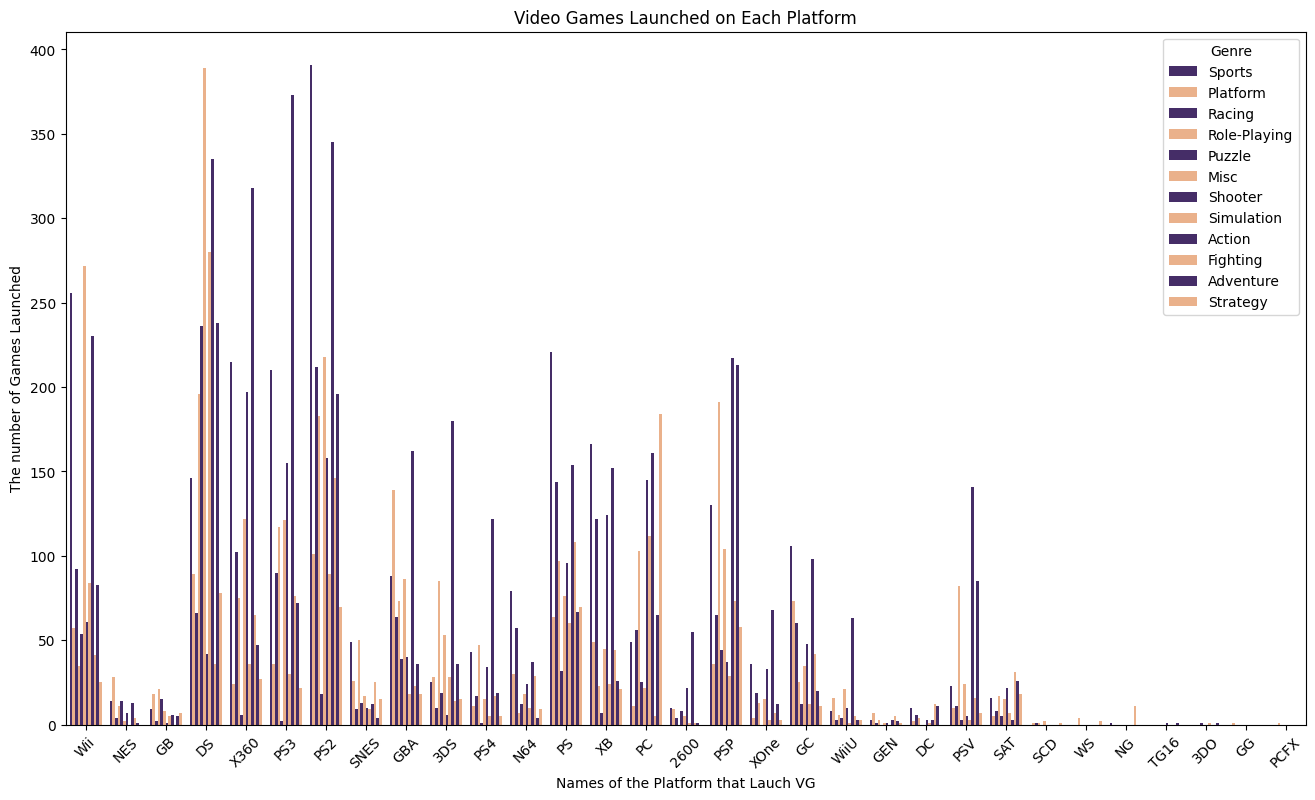

In [23]:
# Get insight

plt.figure(figsize=(16,9))
sns.countplot(x='Platform',hue='Genre',data=ds_vg, palette=['#432371',"#FAAE7B"])
plt.xticks(rotation=45)
plt.ylabel('The number of Games Launched')
plt.title('Video Games Launched on Each Platform')
plt.xlabel('Names of the Platform that Lauch VG')
plt.show()

In [29]:
year_2005 = ds_vg[ds_vg['Year']==2005.0]
year_2006 = ds_vg[ds_vg['Year']==2006.0]
year_2007 = ds_vg[ds_vg['Year']==2007.0]
year_2008 = ds_vg[ds_vg['Year']==2008.0]
year_2009 = ds_vg[ds_vg['Year']==2009.0]
year_2010 = ds_vg[ds_vg['Year']==2010.0]
year_2011 = ds_vg[ds_vg['Year']==2011.0]
year_2012 = ds_vg[ds_vg['Year']==2012.0]


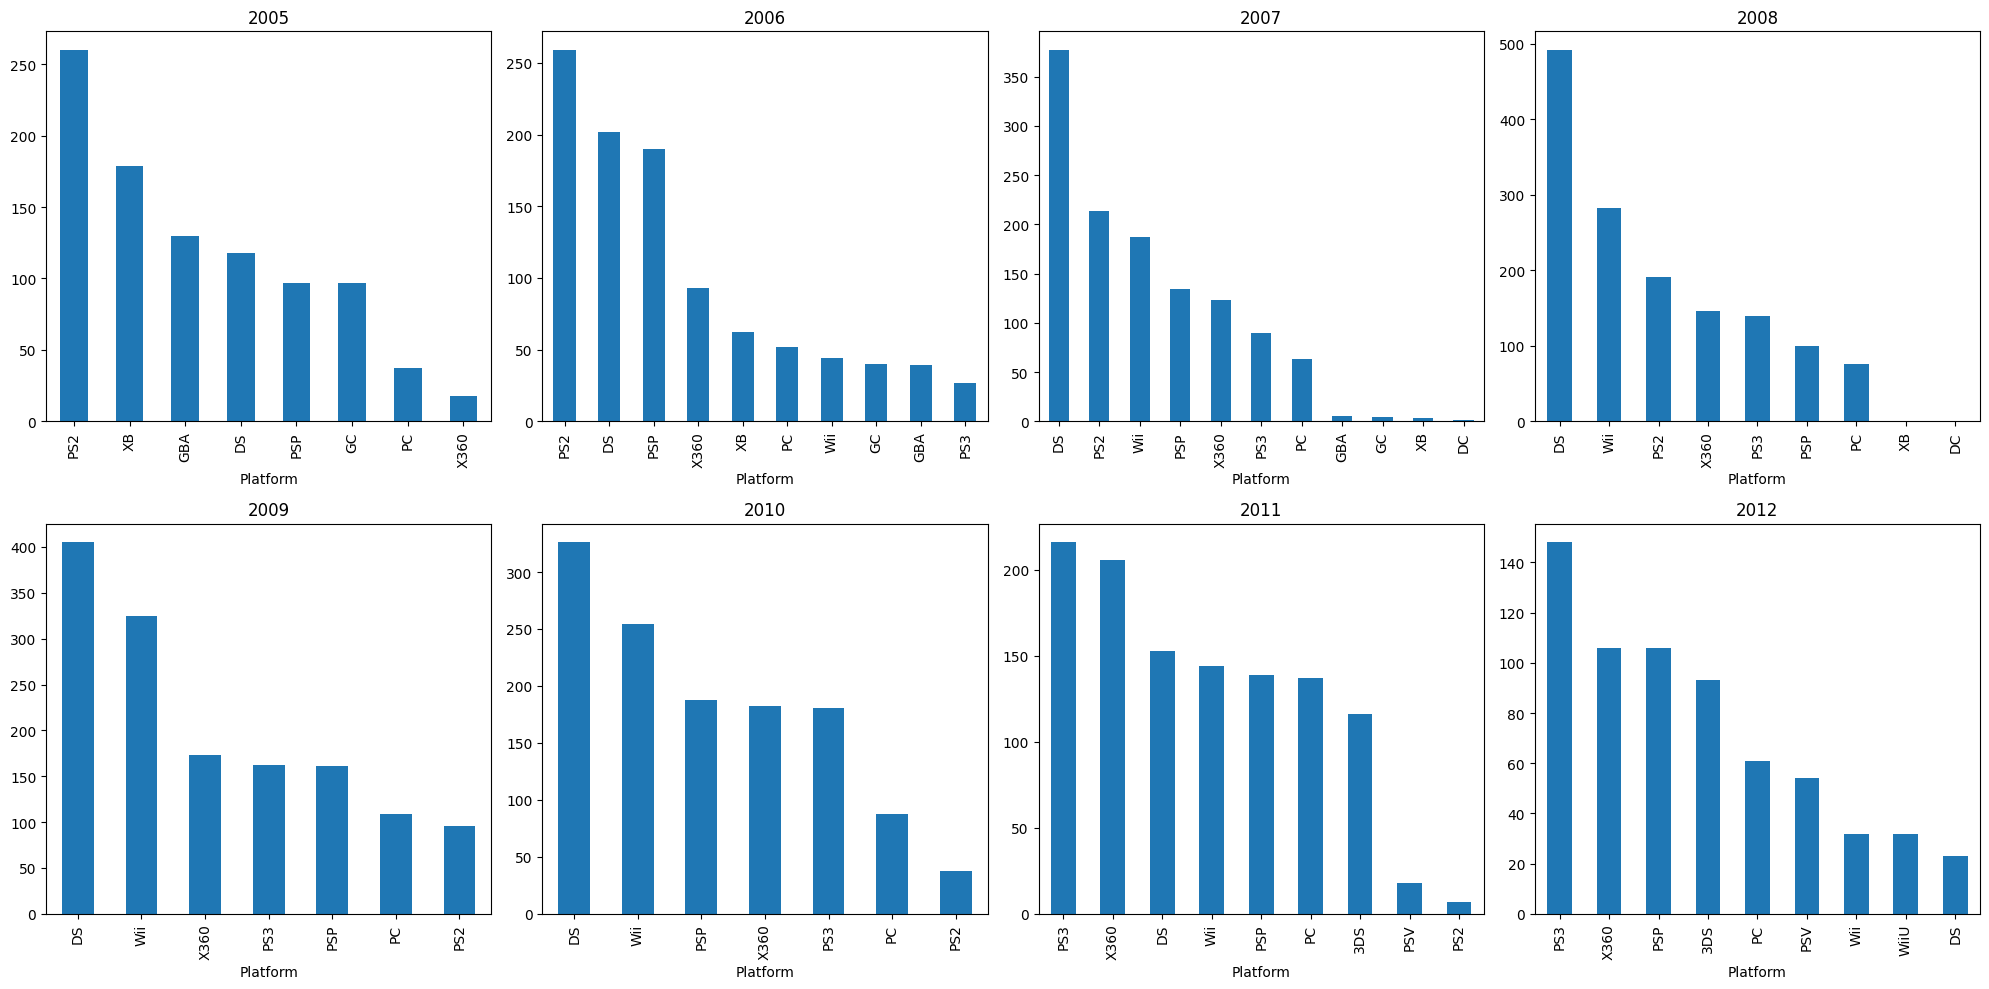

In [34]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
years = [year_2005, year_2006, year_2007, year_2008, year_2009, year_2010, year_2011,year_2012]
titles = ['2005', '2006', '2007', '2008', '2009', '2010', '2011','2012']
axs = axs.flatten()
for i in range(len(years)):
    years[i]['Platform'].value_counts().plot(kind='bar', ax=axs[i], title=titles[i])
plt.tight_layout()
plt.show()

<ipython-input-25-71895466df3c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year',data=ds_vg, palette='Set2')


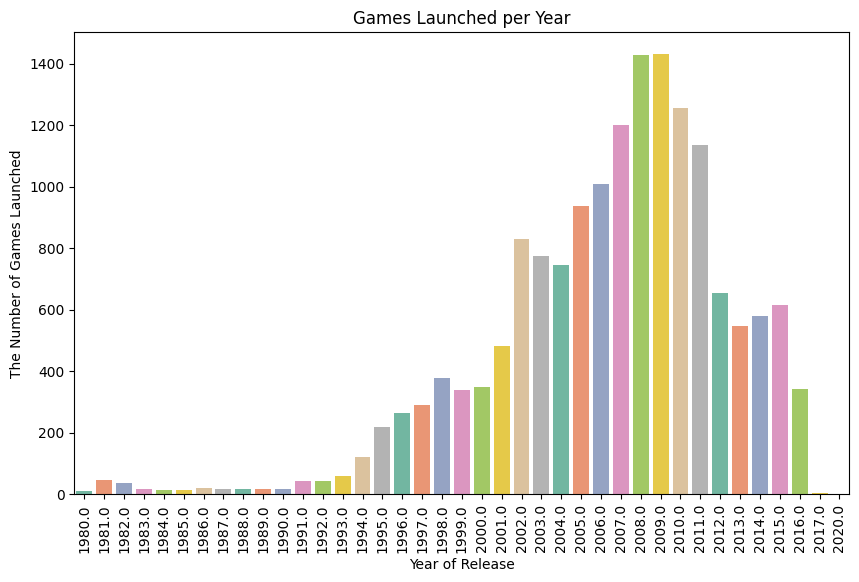

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(x='Year',data=ds_vg, palette='Set2')
plt.xticks(rotation=90)
plt.ylabel('The Number of Games Launched')
plt.xlabel('Year of Release')
plt.title('Games Launched per Year')
plt.show()
#Max games got launched in year 2008 and 2009


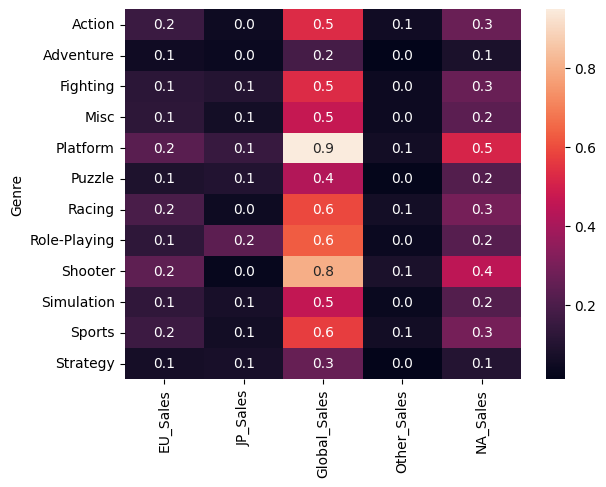

In [36]:
# Correlation matrix
genres_sales = df.groupby("Genre")[["EU_Sales", "JP_Sales", "Global_Sales", "Other_Sales", "NA_Sales"]].agg("mean")

plt.figure(dpi=100)
sns.heatmap(genres_sales, annot=True, fmt = '.1f')
plt.show()

In [37]:
genres_sales.corr()

,EU_Sales,JP_Sales,Global_Sales,Other_Sales,NA_Sales
EU_Sales,1.000000,-0.026863,0.922749,0.951291,0.941942
JP_Sales,-0.026863,1.000000,0.318791,-0.130550,0.099995
Global_Sales,0.922749,0.318791,1.000000,0.829293,0.965995
Other_Sales,0.951291,-0.130550,0.829293,1.000000,0.848246
NA_Sales,0.941942,0.099995,0.965995,0.848246,1.000000


## Data Preprocessing

In [40]:
# Dealing with missing values
ds_vg['Year'].fillna(ds_vg['Year'].mode()[0], inplace=True)

# Imputing missing values in categorical columns with mode
ds_vg['Publisher'].fillna(ds_vg['Publisher'].mode()[0], inplace=True)

In [41]:
ds_vg.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

## Exploratory Data Analysis Section

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

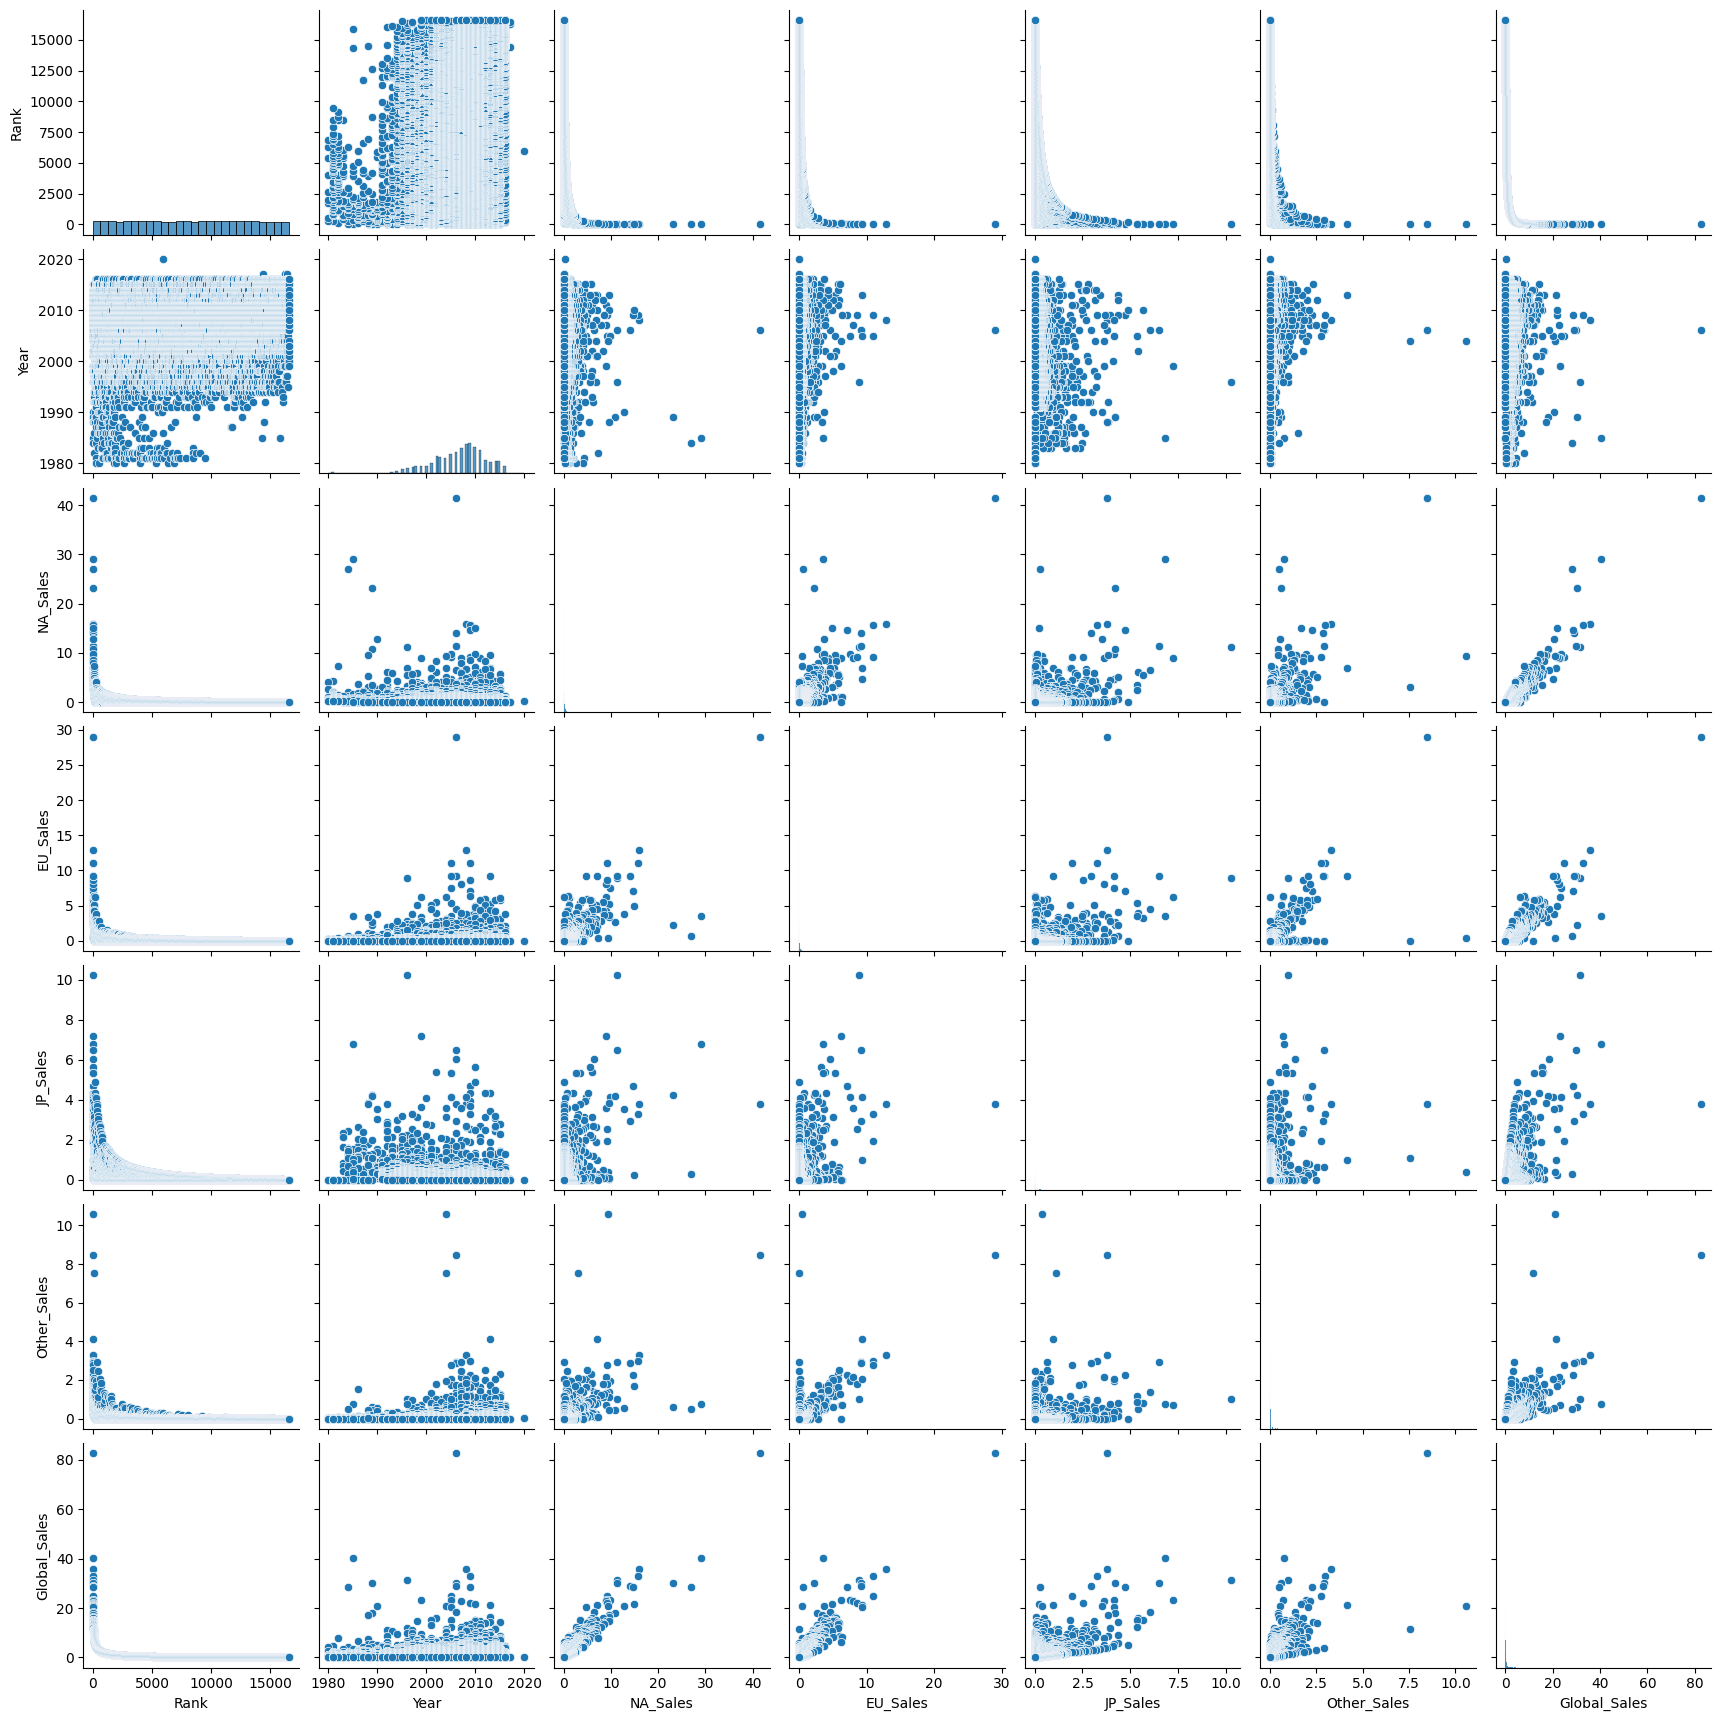

In [42]:
sns.pairplot(data=ds_vg, palette='Set2')

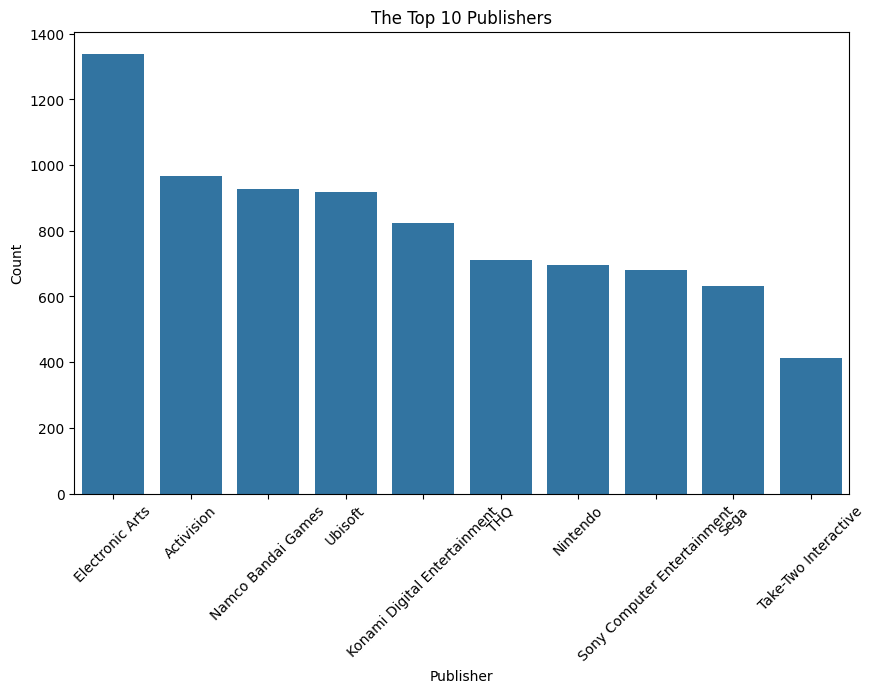

In [48]:
top_publishers = ds_vg['Publisher'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_publishers.index, y=top_publishers.values)
plt.title('The Top 10 Publishers')
plt.xlabel('Publisher')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

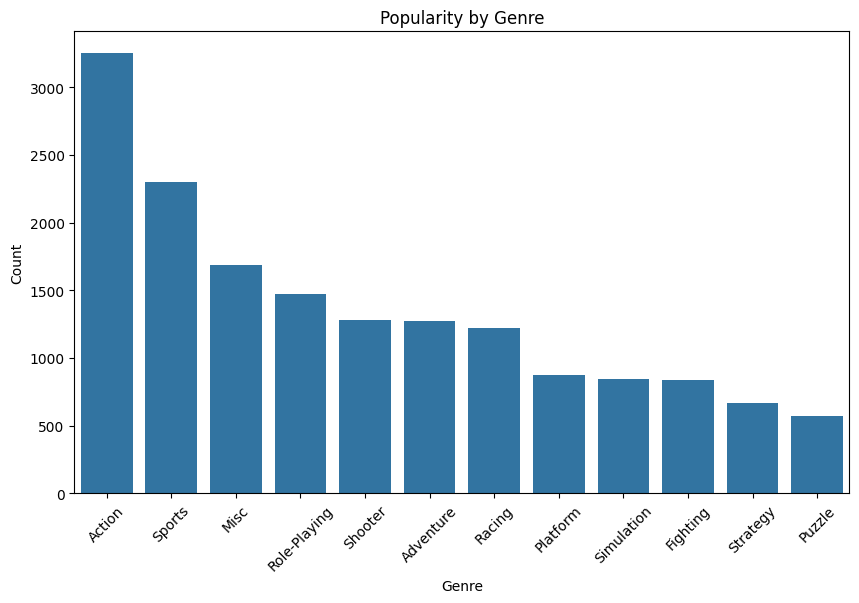

In [50]:
genre_counts = df['Genre'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Sales from the year 1980 - 2020

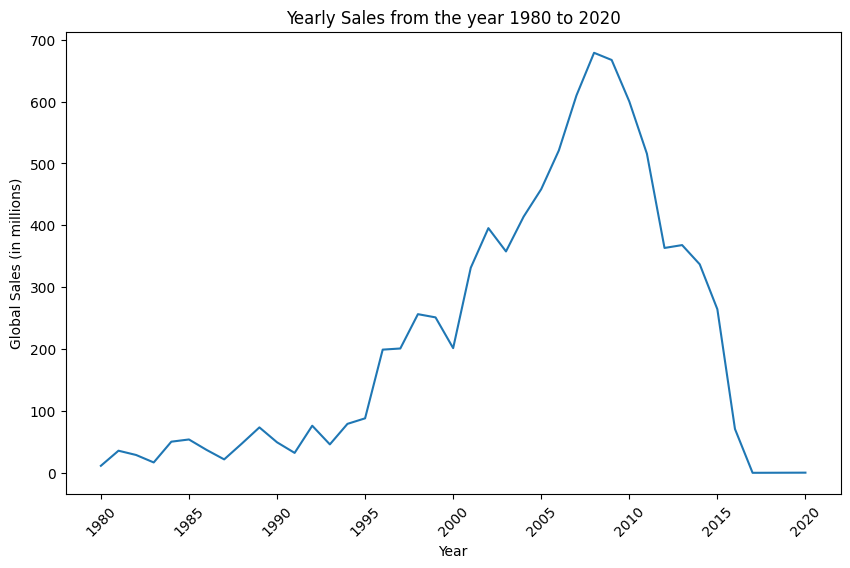

In [53]:
# 5-year wise Sales from from the year 1980 to 2020

yearly_sales = df.groupby('Year')['Global_Sales'].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_sales.index, y=year_sales.values)
plt.title('Yearly Sales from the year 1980 to 2020')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45)
plt.show()

## Correlation Plot

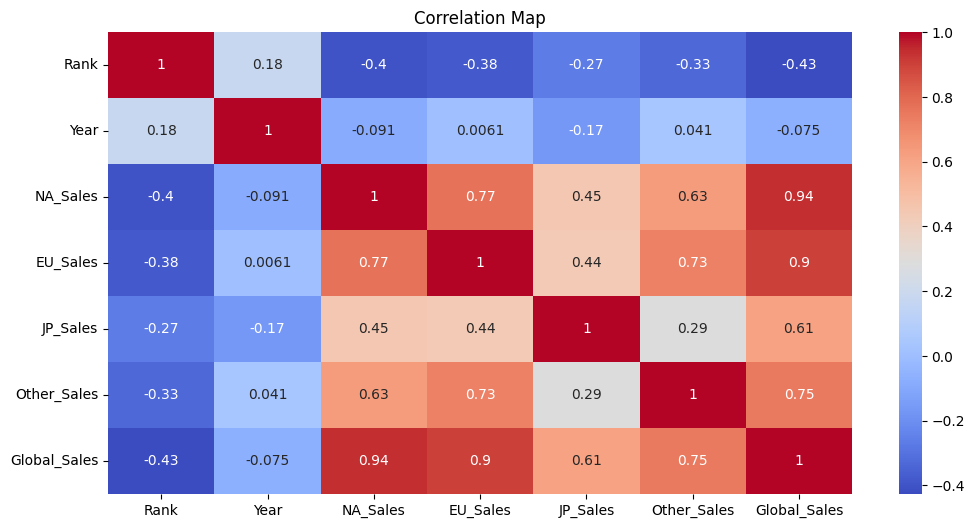

In [54]:
numerical_data=ds_vg.select_dtypes(include=[np.number])
plt.figure(figsize=(12,6))
sns.heatmap(data=numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Map')
plt.show()



```
# This is formatted as code
```

## The Best 10 Video Games Based on Sales

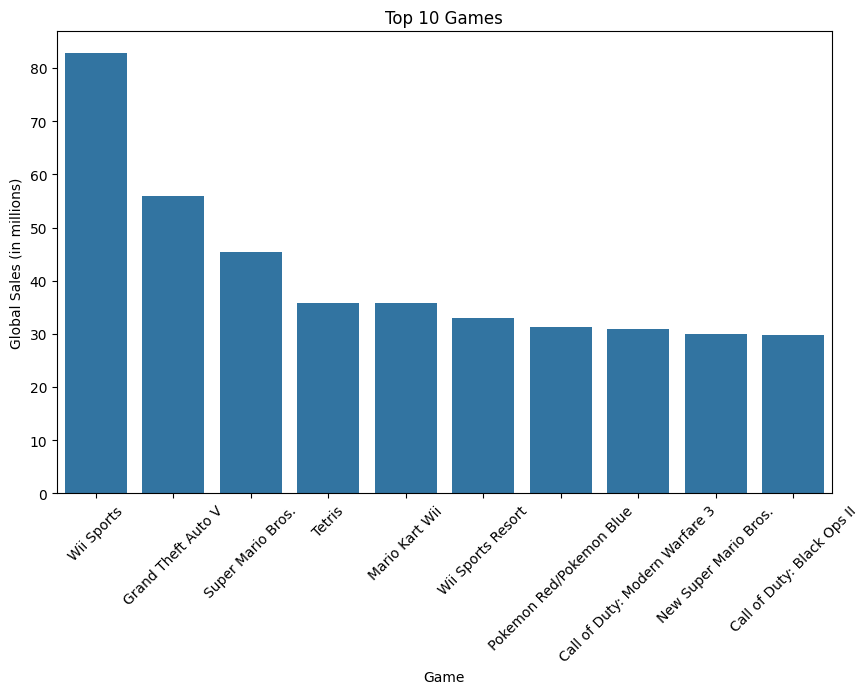

In [63]:
top_games = ds_vg.groupby('Name')['Global_Sales'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_games.index, y=top_games.values)
plt.title('Top 10 Games')
plt.xlabel('Game')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45)
plt.show()

## Regression Analysis

In [67]:
# Import libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Select the features and target variable
X = ds_vg[['Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
y = ds_vg['Global_Sales']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")




Mean Squared Error: 36415848651561.97
R-squared: -8512417759218.085


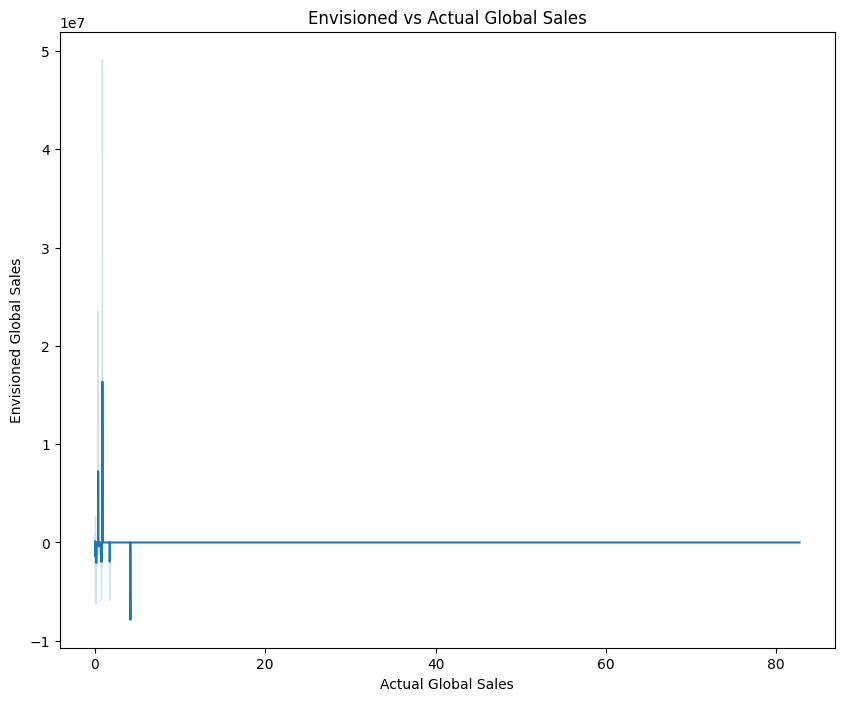

In [75]:
# Visualize Prediction

# Scatter plot of predicted vs actual global sales
plt.figure(figsize=(10, 8))
sns.lineplot(x=y_test, y=y_pred)
plt.xlabel('Actual Global Sales')
plt.ylabel('Envisioned Global Sales')
plt.title('Envisioned vs Actual Global Sales')
plt.show()

## Key Take Aways
#### The video game sales dataset provides a wealth of information for analyzing patterns, trends and preferences in the gaming industry. It includes details on games' sales performance across regions, genres, publishers, platforms and years.

#### Exploratory data analysis and visualization techniques can yield valuable insights. For example, distribution of global sales can be understood. The top performing publishers, genres and platforms can be identified. Sales trends over the years can also be observed.

#### Relationships between variables and their impact on global sales can be determined through a correlation analysis. This may highlight influential factors for game success.

#### Predictive modeling using machine learning allows global sales to be forecast based on available features. This provides additional perspective into what drives video game sales outcomes.

#### Overall, mining this dataset through data exploration, correlation assessment and predictive analysis offers comprehensive learnings for researchers, developers, marketers and gaming enthusiasts. It enhances understanding of video game commercial factors and dynamics within the industry.